In [ ]:
import numpy as np

matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# order引数を指定しない場合はデフォルトで2ノルムが計算される
# 行方向のノルム計算
row_norm = np.linalg.norm(matrix, axis=1)
print("行方向のノルム:", row_norm)

# 列方向のノルム計算
col_norm = np.linalg.norm(matrix, axis=0)
print("列方向のノルム:", col_norm)

In [ ]:
matrix = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
matrix1 = matrix.reshape(2, -1)  # -1を指定すると自動で要素数を計算してくれる
matrix2 = matrix.reshape(-1, 2)
matrix3 = matrix.reshape(-1, 2, order="F")  # order引数でFortranスタイルの順序で要素を並べることができる
vector3 = matrix3.reshape(-1, order="F")  # 1次元配列に変換
vector3_ = matrix3.reshape(-1)
print(matrix1)
print(matrix2)
print(matrix3)
print(vector3)
print(vector3_)

In [ ]:
matrix = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
matrix = matrix.reshape(-1, 2, order="F")
print(matrix)
norm = np.linalg.norm(matrix, axis=1)
print(norm)
tile = np.tile(norm[:, np.newaxis], (1, 2))
print(tile)
t = np.maximum(tile, 0) * matrix
print(t)

In [ ]:
vec = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(vec[0:5])

In [ ]:
import scipy.sparse as sparse
n = 4
m = 8
N = n * n
M = m * m

Di = sparse.eye(M, format='lil') - sparse.eye(M, k=m, format='lil')
Di[-m:, :] = 0
Di = Di.toarray()

Dj = sparse.eye(M, format='lil') - sparse.eye(M, k=1, format='lil')
for p in range(1, m + 1):
    Dj[m * p - 1, m * p - 1] = 0
    if p < m:
        Dj[m * p - 1, m * p] = 0
Dj = Dj.toarray()

Dk = sparse.eye(N, format='lil') - sparse.eye(N, k=n, format='lil')
Dk = sparse.csr_matrix(Dk[:n * (n - 1), :N])
Dk = sparse.vstack([Dk, sparse.csr_matrix((n, N))])
Dk = Dk.toarray()

Dl = sparse.eye(N, format='lil') - sparse.eye(N, k=1, format='lil')
for p in range(1, n + 1):
    Dl[n * p - 1, n * p - 1] = 0
    if p < n:
        Dl[n * p - 1, n * p] = 0
Dl = Dl.toarray()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diのヒートマップ
plt.figure(figsize=(8, 8))
sns.heatmap(Di, cmap='coolwarm', cbar=False)
plt.title('Di Heatmap')
plt.show()

# Djのヒートマップ
plt.figure(figsize=(8, 8))
sns.heatmap(Dj, cmap='coolwarm', cbar=False)
plt.title('Dj Heatmap')
plt.show()

# Dkのヒートマップ
plt.figure(figsize=(8, 8))
sns.heatmap(Dk, cmap='coolwarm', cbar=False)
plt.title('Dk Heatmap')
plt.show()

# Dlのヒートマップ
plt.figure(figsize=(8, 8))
sns.heatmap(Dl, cmap='coolwarm', cbar=False)
plt.title('Dl Heatmap')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 64x64の画像を読み込む
image_path = '../../OneDrive - m.titech.ac.jp/Lab/data/sample_image64/Cameraman64.png'  # 画像ファイルへのパスを指定
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 128x128のPSFを定義する（ガウシアンぼけを例としています）
psf = cv2.getGaussianKernel(128, 3)  # 標準偏差20の1次元ガウシアンカーネル
psf = np.outer(psf, psf)             # 2次元ガウシアンカーネルに変換

# 畳み込みを実行する
blurred_image = cv2.filter2D(image, -1, psf)

# 結果を表示する
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)

plt.figure(figsize=(5, 5))
plt.imshow(psf, cmap='gray')
plt.title('PSF')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
"""Show image"""
import matplotlib.pyplot as plt
from PIL import Image

image_path = '../data/240818/hadamard_FISTA_l122_p-10_lmd-100.png'
img = Image.open(image_path)

width, height = img.size 

fig, ax = plt.subplots(figsize=(width, height), dpi=1, tight_layout=True)
ax.imshow(img, cmap="gray")
ax.axis("off")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = '../data'
H_SETTING = "hadamard_pr-du_p-5_lmd1-10.0_lmd2-1000.0"
# H_SETTING = "gf"
H = np.load(f"{DATA_PATH}/240825/systemMatrix/H_matrix_{H_SETTING}.npy")
partH = H[512:1024, 1:256]
# heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(partH, cmap='coolwarm', cbar=True)
plt.title('Hadamard Heatmap')
plt.show()

(16384, 4096)
(128, 128, 64, 64)


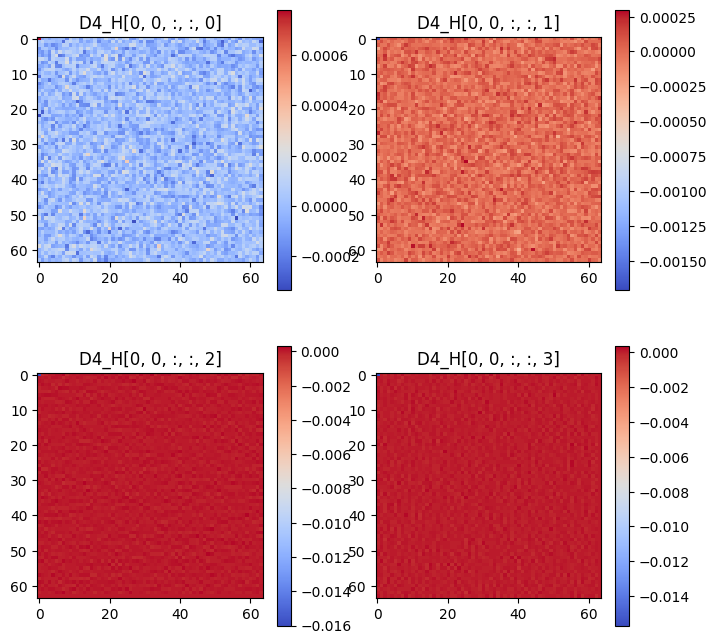

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_to_tensor(H, m, n):
    H_tensor = np.zeros((m, m, n, n))
    for i in range(m):
        for j in range(m):
            for k in range(n):
                for l in range(n):
                    H_tensor[i, j, k, l] = H[i * m + j, k * n + l]
    return H_tensor


def D4(im):
    i, j, k, l = im.shape
    di = np.concatenate(
        [im[1:, :, :, :] - im[0:-1, :, :, :], np.zeros([1, j, k, l])], axis=0)
    dj = np.concatenate(
        [im[:, 1:, :, :] - im[:, 0:-1, :, :], np.zeros([i, 1, k, l])], axis=1)
    dk = np.concatenate(
        [im[:, :, 1:, :] - im[:, :, 0:-1, :], np.zeros([i, j, 1, l])], axis=2)
    dl = np.concatenate(
        [im[:, :, :, 1:] - im[:, :, :, 0:-1], np.zeros([i, j, k, 1])], axis=3)
    return np.stack([di, dj, dk, dl], axis=4)


DATA_PATH = '../../OneDrive - m.titech.ac.jp/Lab/data'
H_SETTING = "true"
H = np.load(f"{DATA_PATH}/systemMatrix/H_matrix_{H_SETTING}.npy")
print(H.shape)
H_tensor = matrix_to_tensor(H, 128, 64)
print(H_tensor.shape)

# plot D4
D4_H = D4(H_tensor)

(128, 128, 64, 64, 4)


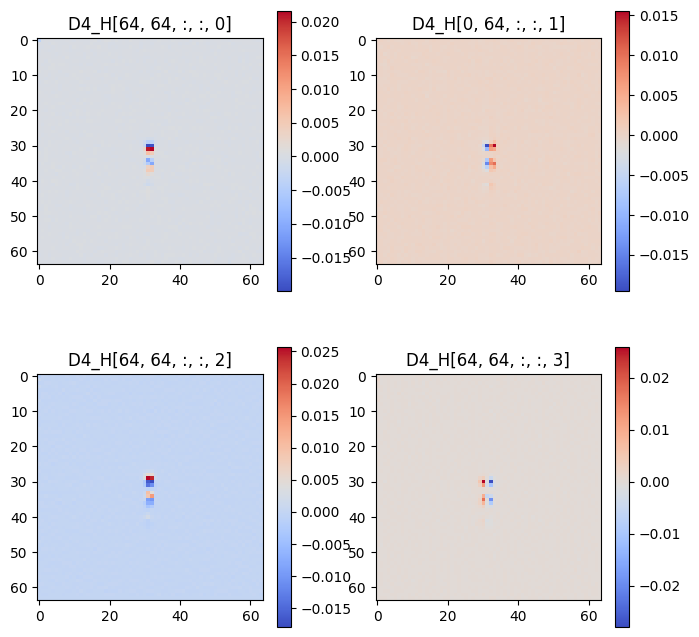

In [2]:
print(D4_H.shape)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(D4_H[64, 64, :, :, 0], cmap='coolwarm')
plt.title('D4_H[64, 64, :, :, 0]')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(D4_H[64, 64, :, :, 1], cmap='coolwarm')
plt.title('D4_H[0, 64, :, :, 1]')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(D4_H[64, 64, :, :, 2], cmap='coolwarm')
plt.title('D4_H[64, 64, :, :, 2]')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(D4_H[64, 64, :, :, 3], cmap='coolwarm')
plt.title('D4_H[64, 64, :, :, 3]')
plt.colorbar()
plt.show()